In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("../csv/msft.csv", skipfooter = 1)

C:\Users\emili\AppData\Local\Temp\ipykernel_3380\371182638.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../csv/msft.csv", skipfooter = 1)


In [3]:
df.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


In [4]:
df.tail()

,Name,Rating,No of people Rated,Category,Date,Price
5316,Get Color,3.0,785,Developer Tools,08-08-2019,₹ 54.50
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5321 entries, 0 to 5320
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5321 non-null   object 
 1   Rating              5321 non-null   float64
 2   No of people Rated  5321 non-null   int64  
 3   Category            5321 non-null   object 
 4   Date                5321 non-null   object 
 5   Price               5321 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 249.5+ KB


In [6]:
df.describe()

,Rating,No of people Rated
count,5321.000000,5321.000000
mean,3.792708,551.798722
std,0.991681,259.787733
min,1.000000,100.000000
25%,3.500000,327.000000
50%,4.000000,548.000000
75%,4.500000,779.000000
max,5.000000,1000.000000


In [7]:
df.columns = (c.lower().replace(" ", "_") for c in df.columns)

In [8]:
df.columns

Index(['name', 'rating', 'no_of_people_rated', 'category', 'date', 'price'], dtype='object')

In [9]:
df["category"].unique()

array(['Books', 'Business', 'Developer Tools', 'Social',
       'Food and Dining', 'Government and Politics', 'Health and Fitness',
       'Kids and Family', 'Lifestyle', 'Multimedia Design', 'Music',
       'Navigation and Maps', 'News and Weather'], dtype=object)

In [10]:
df["is_free"] = df["price"] == "Free"

In [11]:
df["is_free"] = df["is_free"].map({True : 1, False : 0})

In [12]:
df["price"].mask(df["price"] == "Free", "0", inplace = True) 

In [13]:
df["price"] = df["price"].str.replace(",", "")

In [14]:
df["price"] = df["price"].str.replace("₹ ", "")

In [15]:
df["prices"] = df["price"].astype(float)

In [16]:
df["prices"] = (df["prices"] * 3 / 166)

In [17]:
df["category"] = df["category"].map({'Books' : "Books", 'Business' : "Business", 'Developer Tools' : "DevTools", 'Social' : "Social",
       'Food and Dining' : "Food", 'Government and Politics' : "Gov&Pol", 'Health and Fitness' : "Health" ,
       'Kids and Family' : "Family", 'Lifestyle' : "Lifestyle", 'Multimedia Design' : "Multimedia Design", 'Music' : "Music",
       'Navigation and Maps' : "Maps", 'News and Weather' : "News"})

<AxesSubplot:xlabel='category', ylabel='Count'>

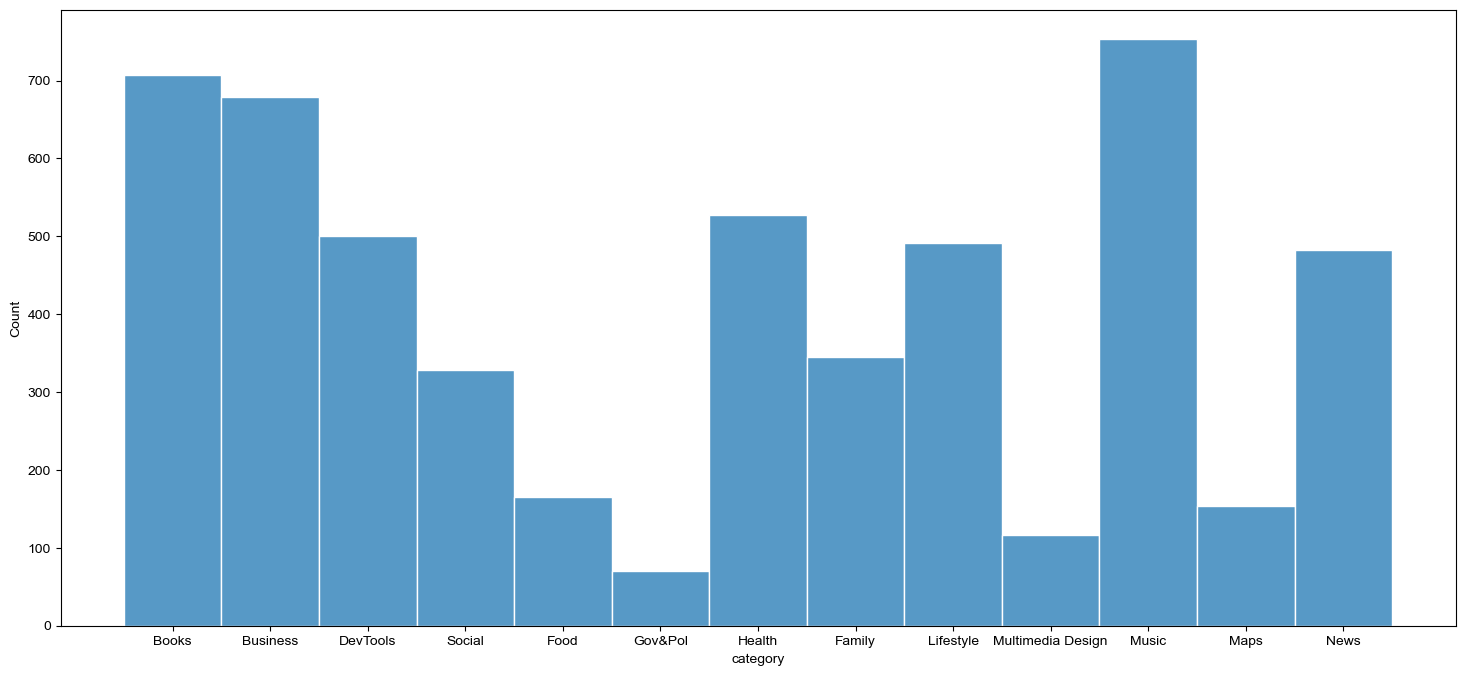

In [18]:
fig, ax = plt.subplots(figsize = (18,8))

sns.set_theme()

sns.histplot(data = df["category"], ax = ax)

<AxesSubplot:xlabel='rating', ylabel='Count'>

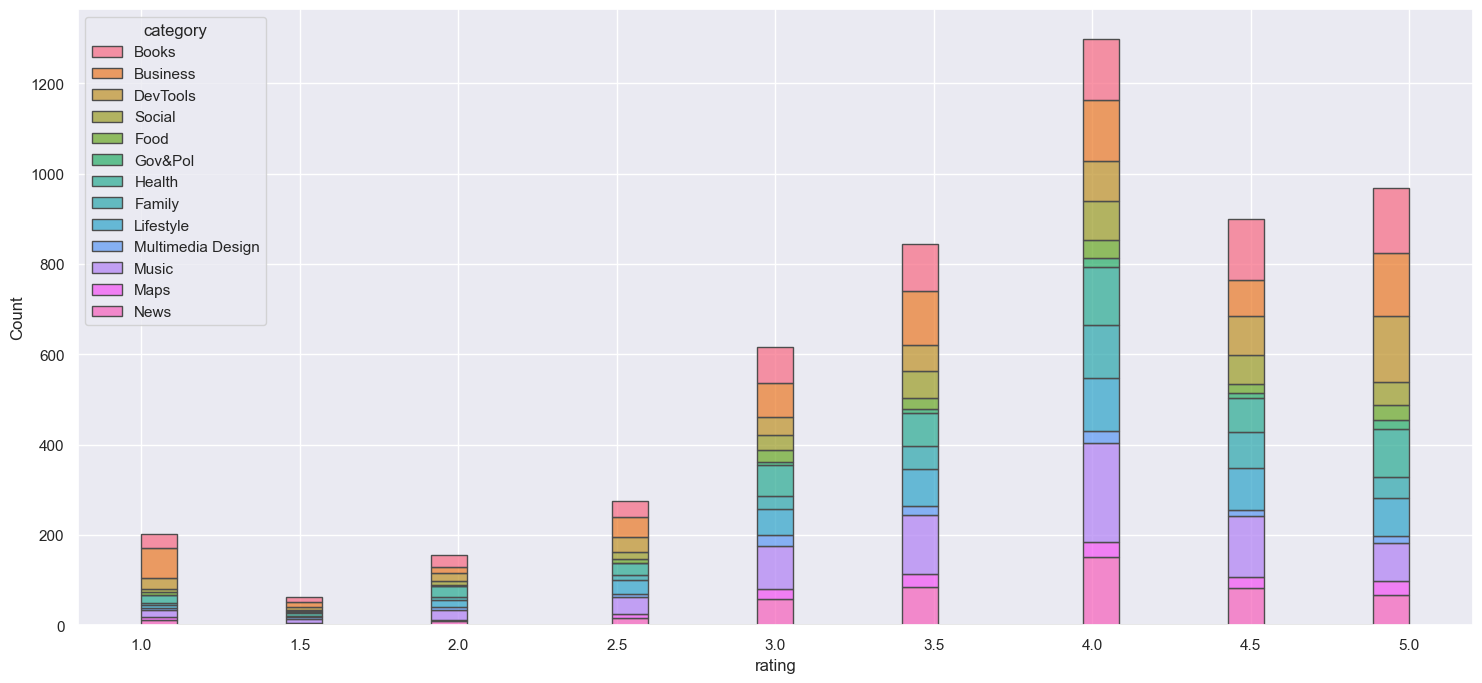

In [19]:
fig, ax = plt.subplots(figsize = (18,8))

sns.histplot(data = df, ax = ax, x = df["rating"], hue = df["category"], palette = "husl", edgecolor = "0.3", multiple = "stack")